<a href="https://colab.research.google.com/github/ChairaWandau/3DML_OpenCV_HomeWorks/blob/main/OpenCV/OpenCV_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).

In [6]:
import sys
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

In [2]:
# Клонируем репозиторий с картинкой
!git clone https://github.com/ChairaWandau/3DML_OpenCV_HomeWorks.git

Cloning into '3DML_OpenCV_HomeWorks'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 7.90 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (5/5), done.


Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

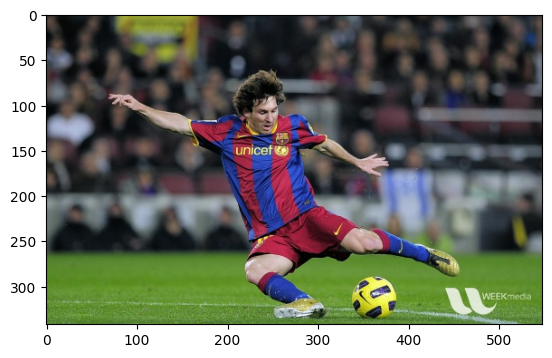

In [22]:
img = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/messi5.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img)

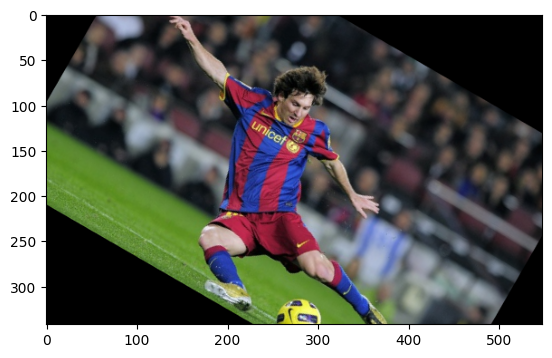

In [23]:
# угол поворота
angle = 30 * pi / 180
# матрица переноса цента изображения в 0,0
Translation = np.float32([
    [1, 0, -img.shape[1]/2],
    [0, 1, -img.shape[0]/2],
    [0, 0, 1]]
)
# матрица поворота
Rotation = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0],
    [0, 0, 1]]
)
# матрица композиции
Transformation = np.dot(np.dot(np.linalg.inv(Translation), Rotation), Translation)
# убираем из матрицы композиции последнюю строку, потому что иначе warpAffine не работает
Transformation = np.float32([
    [Transformation[0][0], Transformation[0][1], Transformation[0][2]],
    [Transformation[1][0], Transformation[1][1], Transformation[1][2]]]
)

height, width = img.shape[:2]
img_res = cv.warpAffine(img, Transformation, (width, height))

plt.imshow(img_res)

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).

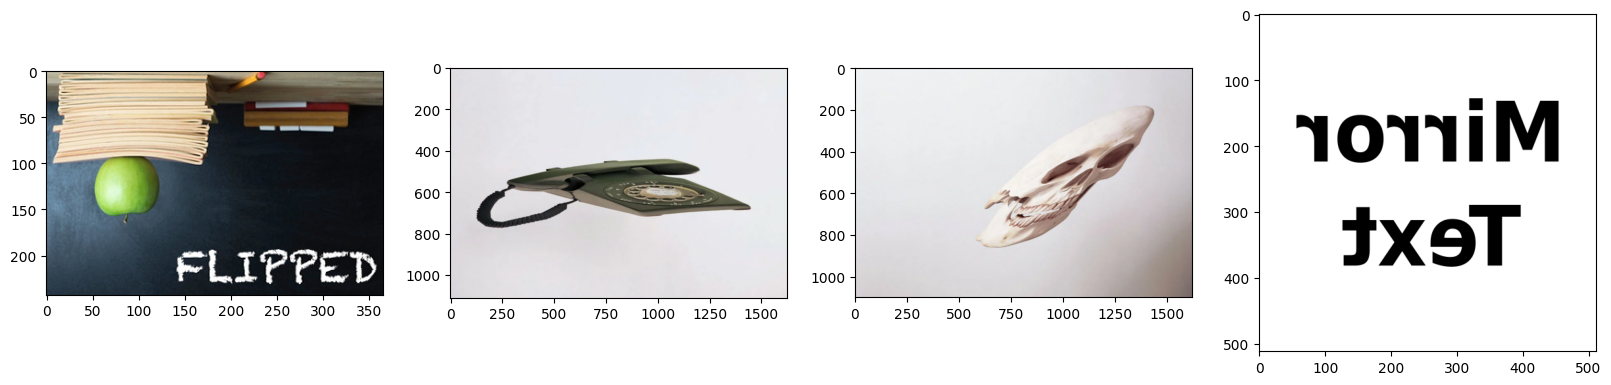

In [36]:
img_apple = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/apple.jpg"), cv.COLOR_BGR2RGB)
img_phone = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/phone.png"), cv.COLOR_BGR2RGB)
img_skull = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/skull.png"), cv.COLOR_BGR2RGB)
img_text = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/text.png"), cv.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img_apple)
plt.subplot(1, 4, 2)
plt.imshow(img_phone)
plt.subplot(1, 4, 3)
plt.imshow(img_skull)
plt.subplot(1, 4, 4)
plt.imshow(img_text)

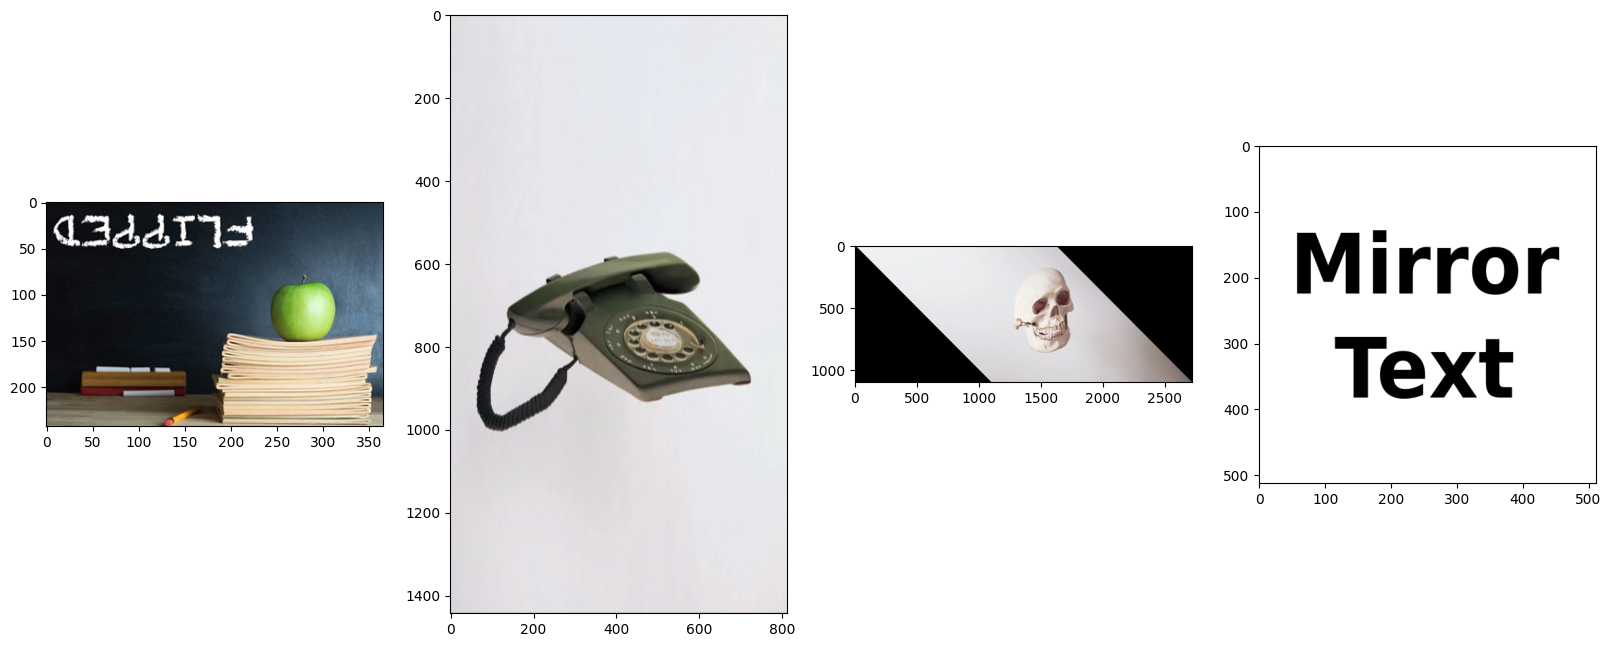

In [88]:
plt.figure(figsize=(20, 20))

# Apple
angle = 180 * pi / 180
# матрица переноса цента изображения в 0,0
apple_Translation = np.float32([
    [1, 0, -img_apple.shape[1]/2],
    [0, 1, -img_apple.shape[0]/2],
    [0, 0, 1]]
)
# матрица поворота
apple_Rotation = np.float32([
    [cos(angle), -sin(angle), 0],
    [sin(angle), cos(angle), 0],
    [0, 0, 1]]
)
# матрица композиции
apple_Transformation = np.dot(np.dot(np.linalg.inv(apple_Translation), apple_Rotation), apple_Translation)
# убираем из матрицы композиции последнюю строку, потому что иначе warpAffine не работает
apple_Transformation = np.float32([
    [apple_Transformation[0][0], apple_Transformation[0][1], apple_Transformation[0][2]],
    [apple_Transformation[1][0], apple_Transformation[1][1], apple_Transformation[1][2]]]
)
img_apple_res = cv.warpAffine(img_apple, apple_Transformation, (img_apple.shape[1],img_apple.shape[0]))
plt.subplot(1, 4, 1)
plt.imshow(img_apple_res)
#----------------------------------------------------------
# Phone
# матрица масштабирования
phone_Scale = np.float32([
    [0.5, 0, 0],
    [0, 1.3, 0]]
)
img_phone_res = cv.warpAffine(img_phone, phone_Scale, (int(img_phone.shape[1]*0.5),int(img_phone.shape[0]*1.3)))
plt.subplot(1, 4, 2)
plt.imshow(img_phone_res)
#----------------------------------------------------------
# Skull
# матрица сдвига
skull_Share = np.float32([
    [1, 1, 0],
    [0, 1, 0]]
)
img_skull_res = cv.warpAffine(img_skull, skull_Share, (int(img_skull.shape[1]*1.68),int(img_skull.shape[0])))
plt.subplot(1, 4, 3)
plt.imshow(img_skull_res)
#----------------------------------------------------------
# Text
# матрица переноса цента изображения в 0,0
text_Translation = np.float32([
    [1, 0, -img_text.shape[1]/2],
    [0, 1, -img_text.shape[0]/2],
    [0, 0, 1]]
)
# матрица зеркального отражения
text_Reflection = np.float32([
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]
)
# матрица композиции
text_Transformation = np.dot(np.dot(np.linalg.inv(text_Translation), text_Reflection), text_Translation)
# убираем из матрицы композиции последнюю строку, потому что иначе warpAffine не работает
text_Transformation = np.float32([
    [text_Transformation[0][0], text_Transformation[0][1], text_Transformation[0][2]],
    [text_Transformation[1][0], text_Transformation[1][1], text_Transformation[1][2]]]
)
img_text_res = cv.warpAffine(img_text, text_Transformation, (int(img_text.shape[1]),int(img_text.shape[0])))
plt.subplot(1, 4, 4)
plt.imshow(img_text_res)